In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model

In [2]:
dfreal = pd.read_excel('realestate.xls')
dfreal.shape[0]
dfreal.shape[1]

realDict = {'No': 'No','X1 transaction date': 'Date', 'X2 house age': 'House_age', 'X3 distance to the nearest MRT station': 'nearest_station_distance',
            'X4 number of convenience stores': 'number_convienience_store', 'X5 latitude': 'latitude', 'X6 longitude': 'longitude', 'Y house price of unit area': 'price_per_unit'}
dfreal.rename(columns=realDict, inplace=True)
dfreal.head()

,No,Date,House_age,nearest_station_distance,number_convienience_store,latitude,longitude,price_per_unit
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


,No,Date,House_age,nearest_station_distance,number_convienience_store,latitude,longitude,price_per_unit,predicted_price
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9,34.387068
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2,37.530673
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3,39.089901
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8,39.089901
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1,41.177255


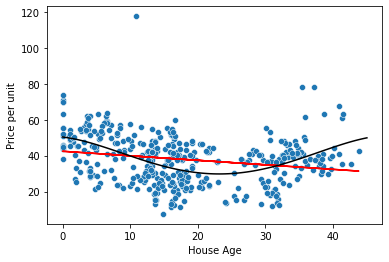

In [3]:
sns.scatterplot(x='House_age', y ='price_per_unit', data=dfreal)
plt.xlabel('House Age')
plt.ylabel('Price per unit')
reg = linear_model.LinearRegression()
poly_reg = linear_model.LinearRegression()
reg.fit(dfreal[['House_age']], dfreal.price_per_unit)
#reg.predict(dfreal.House_age[4].reshape(1,1))
dfreal['predicted_price'] = reg.predict(dfreal[['House_age']])
plt.plot(dfreal.House_age, dfreal.predicted_price, color = 'red')
poly3 = np.polyfit(dfreal.House_age, dfreal.price_per_unit, 4)
xp = np.linspace(0, 45, 100)
plt.plot(xp, np.polyval(poly3, xp), color = 'black')
dfreal.head()


In [4]:
import math
reg = linear_model.LinearRegression()
# used to train the model on training set
reg.fit(dfreal[['House_age', 'nearest_station_distance', 'number_convienience_store']], dfreal.price_per_unit)
print('Coeffiecients are: ', reg.coef_)
print('Intercept is: ', reg.intercept_)
print('Price per unit: ',math.floor(reg.predict([[25, 90, 10]])))

Coeffiecients are:  [-0.25285583 -0.00537913  1.29744248]
Intercept is:  42.9772862060641
Price per unit:  49


In [5]:
from word2number import w2n
autodf = pd.read_csv('auto.csv', header=None)
autodf.columns = ['symboling', 'normalized_loss', 'make', 'fuel_type', 'aspiration', 'number_of_doors', 'body_style', 
                    'drive_wheels', 'engine_location', 'wheelbase', 'length', 'width', 'height', 'curb_weight', 
                    'engine_type', 'num_of_cylinders', 'engien_size', 'fuel_system','bore', 'stroke', 'compression_ratio', 
                    'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
autodf.drop(columns=['symboling', 'normalized_loss', 'aspiration', 'body_style',
                     'drive_wheels', 'engine_location', 'fuel_system'], inplace=True)
autodf.num_of_cylinders =autodf.num_of_cylinders.apply(w2n.word_to_num)
autoDic = {'?': 0}
autodf['horsepower'] = autodf['horsepower'].replace(autoDic).astype(int)
autodf.head()

,make,fuel_type,number_of_doors,wheelbase,length,width,height,curb_weight,engine_type,num_of_cylinders,engien_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,two,88.6,168.8,64.1,48.8,2548,dohc,4,130,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,two,88.6,168.8,64.1,48.8,2548,dohc,4,130,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,two,94.5,171.2,65.5,52.4,2823,ohcv,6,152,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,four,99.8,176.6,66.2,54.3,2337,ohc,4,109,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,gas,four,99.4,176.6,66.4,54.3,2824,ohc,5,136,3.19,3.40,8.0,115,5500,18,22,17450


['autoreg_joblib']

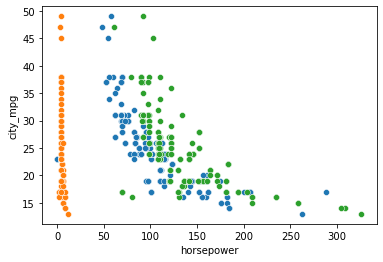

In [6]:
autoreg = linear_model.LinearRegression()
autoreg.fit(autodf[['num_of_cylinders', 'engien_size', 'horsepower']], autodf.city_mpg)
sns.scatterplot(x='horsepower', y='city_mpg', data=autodf)
sns.scatterplot(x='num_of_cylinders', y='city_mpg', data=autodf)
sns.scatterplot(x='engien_size', y='city_mpg', data=autodf)
autodf['city_mpg_predicted'] = autoreg.predict(
    autodf[['num_of_cylinders', 'engien_size', 'horsepower']])
autodf.head()

import joblib
joblib.dump(autoreg, 'autoreg_joblib')

# Gradient Descent (cost funtion or MSE)

In [7]:
def predict_sklearn():
    reg = linear_model.LinearRegression()
    reg.fit(autodf[['horsepower']], autodf.city_mpg)
    return reg.coef_, reg.intercept_

def gradient_descent(x, y):
    m_curr = b_curr = 0
    iterations = 1000
    n = len(xp)
    learning_rate = .0001
    cost_previous =0
    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n)* sum((y - y_predicted)**2)
        m_derivative = -(2/n) + sum(-x * (y - y_predicted))
        b_derivative = -(2/n) + sum(y - y_predicted)
        m_curr = m_curr - learning_rate * m_derivative
        b_curr = m_curr - learning_rate * b_derivative
        if math.isclose(cost, cost_previous, rel_tol=1e-20):
            break
        cost_previous = cost
        #print('m_value {}, b_value {}, cost_value {}, iterations {}'.format(m_curr, b_curr, cost, i))
    return m_curr, b_curr

if __name__ == '__main__':
    m_sklrn, b_sklrn = predict_sklearn()
    print('Coef {}, Intercept {}'.format(m_sklrn, b_sklrn))

    m, b = gradient_descent(autodf.horsepower, autodf.city_mpg)
    print('G Coef {}, G Intercept {}'.format(m, b))


Coef [-0.12318258], Intercept 37.936761350779236
G Coef -9.131126431332955e+157, G Intercept -9.054193320173361e+157


# One hot encoding

In [8]:
autodf.head()

,make,fuel_type,number_of_doors,wheelbase,length,width,height,curb_weight,engine_type,num_of_cylinders,engien_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,city_mpg_predicted
0,alfa-romero,gas,two,88.6,168.8,64.1,48.8,2548,dohc,4,130,3.47,2.68,9.0,111,5000,21,27,13495,23.183092
1,alfa-romero,gas,two,88.6,168.8,64.1,48.8,2548,dohc,4,130,3.47,2.68,9.0,111,5000,21,27,16500,23.183092
2,alfa-romero,gas,two,94.5,171.2,65.5,52.4,2823,ohcv,6,152,2.68,3.47,9.0,154,5000,19,26,16500,21.899417
3,audi,gas,four,99.8,176.6,66.2,54.3,2337,ohc,4,109,3.19,3.40,10.0,102,5500,24,30,13950,25.729155
4,audi,gas,four,99.4,176.6,66.4,54.3,2824,ohc,5,136,3.19,3.40,8.0,115,5500,18,22,17450,24.822110


In [9]:
dummies = pd.get_dummies(autodf.make)
dummies

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
merged = pd.concat([autodf, dummies], axis= 1)
autofinal = merged.drop(
    ['make', 'nissan', 'fuel_type', 'number_of_doors', 'wheelbase', 'engine_type', 'bore', 
    'stroke', 'compression_ratio', 'peak_rpm', 'highway_mpg', 'city_mpg_predicted'], axis=1)

autoreg = linear_model.LinearRegression()
autofinal.head()


,length,width,height,curb_weight,num_of_cylinders,engien_size,horsepower,city_mpg,price,alfa-romero,...,mitsubishi,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,168.8,64.1,48.8,2548,4,130,111,21,13495,1,...,0,0,0,0,0,0,0,0,0,0
1,168.8,64.1,48.8,2548,4,130,111,21,16500,1,...,0,0,0,0,0,0,0,0,0,0
2,171.2,65.5,52.4,2823,6,152,154,19,16500,1,...,0,0,0,0,0,0,0,0,0,0
3,176.6,66.2,54.3,2337,4,109,102,24,13950,0,...,0,0,0,0,0,0,0,0,0,0
4,176.6,66.4,54.3,2824,5,136,115,18,17450,0,...,0,0,0,0,0,0,0,0,0,0


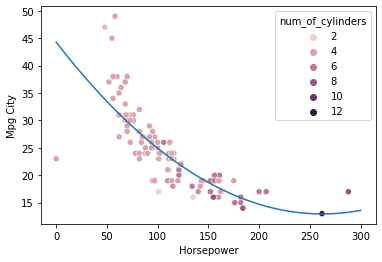

In [11]:
lendic = {'?': 0}
autofinal['length'] = autofinal['length'].replace(lendic).astype(int)
widdic = {'?': 0}
autofinal['width'] = autofinal['width'].replace(widdic).astype(int)
heidic = {'?': 0}
autofinal['height'] = autofinal['height'].replace(heidic).astype(int)
curbdic = {'?': 0}
autofinal['curb_weight'] = autofinal['curb_weight'].replace(curbdic).astype(int)
endic = {'?': 0}
autofinal['engien_size'] = autofinal['engien_size'].replace(endic).astype(int)
prdic = {'?': 0}
autofinal['price'] = autofinal['price'].replace(prdic).astype(int)
X = autofinal.drop(['city_mpg'], axis =1)
autoreg.fit(X, autofinal.city_mpg)
autoreg.score(X, autofinal.city_mpg)
sns.scatterplot(x='horsepower', y='city_mpg',
                hue='num_of_cylinders', data=autofinal)
plt.xlabel('Horsepower')
plt.ylabel('Mpg City')

polyauto = np.polyfit(autofinal.horsepower, autofinal.city_mpg, 2)
xp = np.linspace(0, 300, 100)
plt.plot(xp, np.polyval(polyauto, xp))


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfle = autodf
autodf.make = le.fit_transform(autodf.make)

# Split train and test

In [13]:
autofinal = autofinal[['num_of_cylinders',
                       'engien_size', 'horsepower', 'price', 'city_mpg']]
autofinal.head()                       

,num_of_cylinders,engien_size,horsepower,price,city_mpg
0,4,130,111,13495,21
1,4,130,111,16500,21
2,6,152,154,16500,19
3,4,109,102,13950,24
4,5,136,115,17450,18


,num_of_cylinders,engien_size,horsepower,price,city_mpg
0,4,130,111,13495,21
1,4,130,111,16500,21
2,6,152,154,16500,19
3,4,109,102,13950,24
4,5,136,115,17450,18


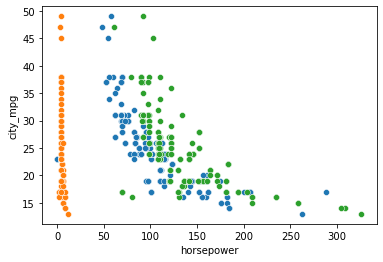

In [14]:
sns.scatterplot(x='horsepower', y='city_mpg', data=autofinal)
sns.scatterplot(x='num_of_cylinders', y='city_mpg', data=autofinal)
sns.scatterplot(x='engien_size', y='city_mpg', data=autofinal)

X = autofinal.drop(['city_mpg'], axis=1)
y = autofinal['city_mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

trainreg = linear_model.LinearRegression()
trainreg.fit(X_train, y_train)
trainreg.score(X_test, y_test)
autofinal.head()

# Logistic Regression

In [15]:
winedf = pd.read_csv('wine.csv')
winedf.dtypes
winedf.isnull().sum()
print(winedf.shape)
winedf['quality'] = winedf['response'].apply(lambda x: 1 if x >= 7 else 0)
winedf.head()

(6497, 13)


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,response,color,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0


Text(0, 0.5, 'Wine Quality')

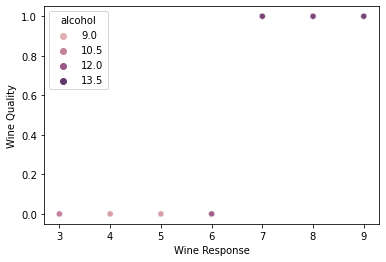

In [16]:
sns.scatterplot(x = winedf.response, y = winedf.quality,hue=winedf.alcohol)
plt.xlabel('Wine Response')
plt.ylabel('Wine Quality')

In [17]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
Z = winedf.drop(['response', 'color'], axis=1)
X = winedf.drop(['response', 'color', 'quality'], axis= 1)
y = winedf['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)
predited = pipe.predict(X_test)

print('Confusion Matrix:\n', confusion_matrix(y_test, predited))
print('Precision: score: ', precision_score(y_test, predited))
print('Accuracy Score: ', accuracy_score(y_test, predited))
print(classification_report(y_test, predited))


#Decision tree
winemodel = tree.DecisionTreeClassifier()
winemodel = winemodel.fit(X_train, y_train)
print('Decsion tree score: ',winemodel.score(X_test, y_test))





Confusion Matrix:
 [[1990  107]
 [ 358  144]]
Precision: score:  0.5737051792828686
Accuracy Score:  0.8210850327048865
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2097
           1       0.57      0.29      0.38       502

    accuracy                           0.82      2599
   macro avg       0.71      0.62      0.64      2599
weighted avg       0.79      0.82      0.80      2599

Decsion tree score:  0.828780300115429


In [18]:
hrdf = pd.read_csv('hrdata.csv')
print(hrdf.shape)
hrdf.head()

(14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [19]:
hrdf.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Text(0, 0.5, 'Left')

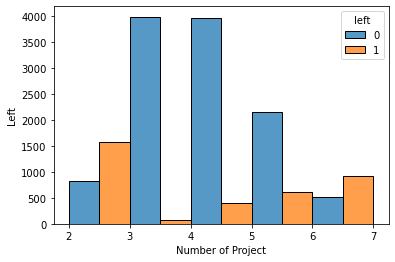

In [20]:
sns.histplot(x='number_project', hue='left',
             multiple='dodge', binwidth=1, data=hrdf)
plt.xlabel('Number of Project')
plt.ylabel('Left')


Text(0, 0.5, 'Left')

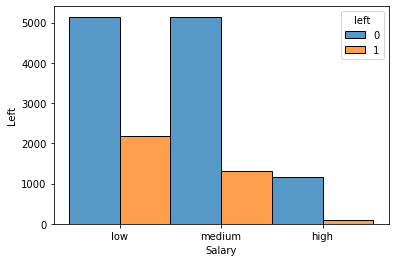

In [21]:
sns.histplot(x='salary', hue='left', multiple='dodge', binwidth=.5, data=hrdf)
plt.xlabel('Salary')
plt.ylabel('Left')


Text(0, 0.5, 'Left')

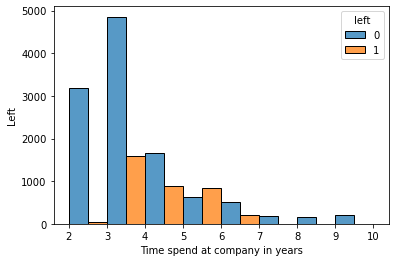

In [22]:
sns.histplot(x='time_spend_company', hue='left', multiple='dodge', binwidth=1, data=hrdf)
plt.xlabel('Time spend at company in years')
plt.ylabel('Left')

Text(0, 0.5, 'Left')

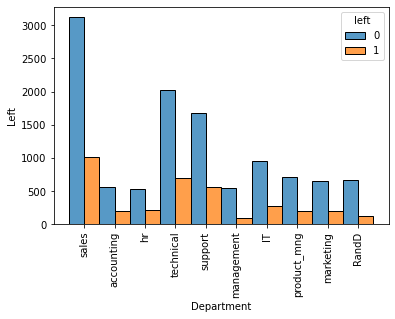

In [23]:
sns.histplot(x='Department', hue='left', multiple='dodge',data=hrdf)
plt.xticks(rotation = 90)
plt.ylabel('Left')


<AxesSubplot:xlabel='Department'>

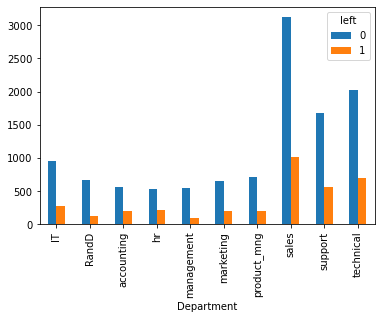

In [24]:
pd.crosstab(hrdf.Department, hrdf.left).plot(kind='bar')

In [25]:
hrdfl_loreg = LogisticRegression()
hrdf_dic = {'low': 3, 'medium': 2, 'high': 1}
hrdf['salary'] = hrdf['salary'].replace(hrdf_dic).astype(int)
X = hrdf[['number_project', 'salary', 'time_spend_company']]
y = hrdf.left

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)
hrdfl_loreg.fit(X_train, y_train)
predict_hrdf = hrdfl_loreg.predict(X_test)
print('Confusion Matrix\n', confusion_matrix(y_test, predict_hrdf))
print('Accuracy', accuracy_score(y_test, predict_hrdf).round(2))
print('Precision', precision_score(y_test, predict_hrdf).round(2))
print(classification_report(y_test, predict_hrdf))


Confusion Matrix
 [[3443   40]
 [1017    0]]
Accuracy 0.77
Precision 0.0
              precision    recall  f1-score   support

           0       0.77      0.99      0.87      3483
           1       0.00      0.00      0.00      1017

    accuracy                           0.77      4500
   macro avg       0.39      0.49      0.43      4500
weighted avg       0.60      0.77      0.67      4500



# Logistic Regression 
(Multiclass Classification)

In [26]:
from sklearn.datasets import load_digits
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

array([0, 1, 2, 3, 4])

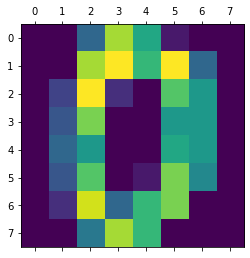

In [27]:
plt.matshow(digits.images[0])
digits.target[0:5]

Confusion Matrix: 
 [[48  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  1  0  2  0]
 [ 0  0 50  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  0  0]
 [ 0  0  0  0 48  0  0  0  0  1]
 [ 0  0  0  0  0 60  0  0  0  2]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0  0 62  1  0]
 [ 0  2  1  0  1  1  0  0 50  0]
 [ 0  0  0  1  0  0  0  1  0 54]]


Text(69.0, 0.5, 'Truth')

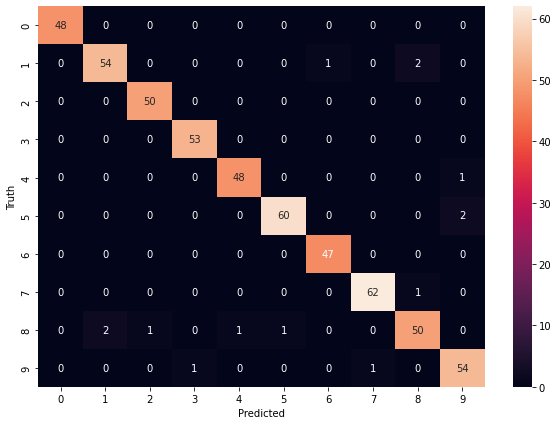

In [28]:

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)
digit_logreg = make_pipeline(StandardScaler(), LogisticRegression())
digit_logreg.fit(X_train, y_train)
digit_logreg.score(X_test, y_test)
digit_pred= digit_logreg.predict(X_test)
digit_pred= digit_logreg.predict(X_test)
cm = confusion_matrix(y_test, digit_pred)
print('Confusion Matrix: \n', cm)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [29]:
from sklearn.datasets import load_iris
irdf = load_iris()
dir(irdf)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

Accuracy: 
 0.98
Statistics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



<AxesSubplot:>

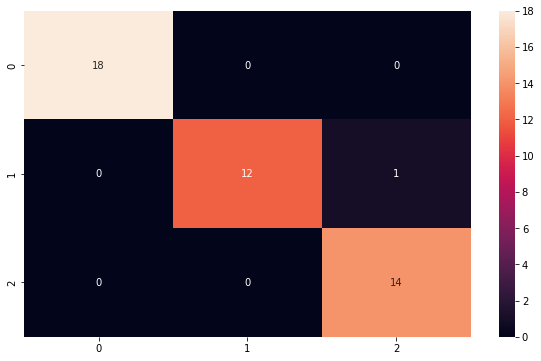

In [30]:
X_train, X_test, y_train, y_test = train_test_split(irdf.data, irdf.target, test_size=0.3)
ir_logreg = make_pipeline( StandardScaler(), LogisticRegression())
ir_logreg.fit(X_train, y_train)
ir_logreg.score(X_test, y_test).round(2)
ir_pred = ir_logreg.predict(X_test)
ir_pred = ir_logreg.predict(X_test)
print('Accuracy: \n', accuracy_score(y_test, ir_pred).round(2))
print('Statistics: \n', classification_report(y_test, ir_pred))
ircm = confusion_matrix(y_test, ir_pred)
plt.figure(figsize=(10,6))
sns.heatmap(ircm, annot=True)


# Decision Tree

In [31]:
titandf = pd.read_csv('titanic.csv')
titandf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
print('Rows and columns: ', titandf.shape)
print('Null values: \n', titandf.isnull().sum())
print('dtypes: \n', titandf.dtypes)

Rows and columns:  (418, 12)
Null values: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
dtypes: 
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [33]:
print('Average age: ', math.floor(titandf['Age'].mean()))
titandf['Age'] = titandf['Age'].fillna(math.floor(titandf['Age'].mean()))
titandf['Fare'] = titandf['Fare'].fillna(0)
titandf.groupby('Survived').mean()


Average age:  30


,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,1102.620301,2.334586,30.210188,0.379699,0.274436,27.424389
1,1096.789474,2.144737,30.227566,0.565789,0.598684,49.747699


Text(0, 0.5, 'Count')

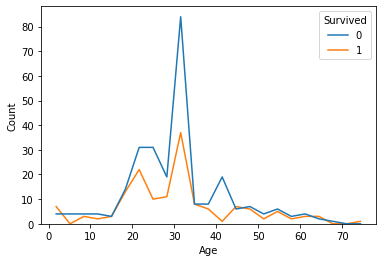

In [34]:
sns.histplot(data= titandf, x = 'Age', hue= 'Survived', element='poly', fill=False)
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

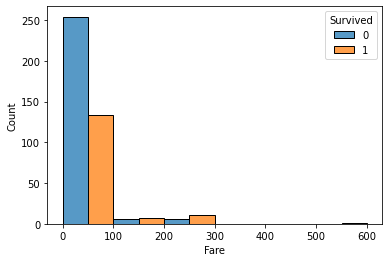

In [35]:
sns.histplot(data=titandf, x='Fare', hue='Survived', multiple='dodge', binwidth=100)
plt.xlabel('Fare')
plt.ylabel('Count')

In [36]:
from sklearn.preprocessing import LabelEncoder
titandf = titandf[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
le_sex = LabelEncoder()
titandf['sex_n'] = le_sex.fit_transform(titandf['Sex'])
titandf.drop(['Sex'], axis=1)

,Survived,Pclass,Age,Fare,sex_n
0,0,3,34.5,7.8292,1
1,1,3,47.0,7.0000,0
2,0,2,62.0,9.6875,1
3,0,3,27.0,8.6625,1
4,1,3,22.0,12.2875,0
...,...,...,...,...,...
413,0,3,30.0,8.0500,1
414,1,1,39.0,108.9000,0
415,0,3,38.5,7.2500,1
416,0,3,30.0,8.0500,1


In [37]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
Z = titandf[['Pclass', 'sex_n', 'Age', 'Fare', 'Survived']]
X = titandf[['Pclass', 'sex_n', 'Age', 'Fare']]
y = titandf.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = model.fit(X_train, y_train)
pred = model.predict(X_test)
print('Score: ', model.score(X_test,y_test))



Score:  1.0


# Support vector machine

In [38]:
from sklearn.datasets import load_iris
iris = load_iris()
print('directory', dir(iris))
print('Features', iris.feature_names)

directory ['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']
Features ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [39]:
dfiris = pd.DataFrame(iris.data, columns=iris.feature_names)
dfiris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
dfiris['target'] = iris.target
print('targets values are: ', iris.target_names)
dfiris.head()

targets values are:  ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
iris_dict_fl = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
dfiris['flower_name'] = dfiris['target'].replace(iris_dict_fl)
#dfiris['flower_name'] = dfiris.target.apply(lambda x: iris.target_names[x])
dfiris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Text(0, 0.5, 'Sepal Width')

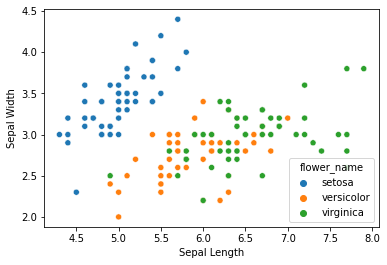

In [42]:
sns.scatterplot(data=dfiris, x='sepal length (cm)', y='sepal width (cm)', hue= 'flower_name')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Text(0, 0.5, 'Petal Width')

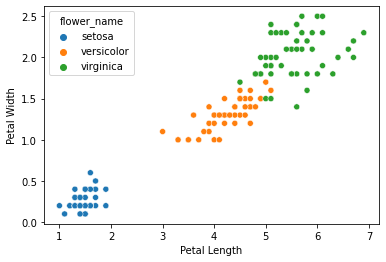

In [43]:
sns.scatterplot(data=dfiris, x='petal length (cm)',
                y='petal width (cm)', hue='flower_name')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [44]:
from sklearn.svm import SVC
svc_model = SVC()
X = dfiris.drop(['target', 'flower_name'], axis= 1)
y = dfiris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)
svc_model.fit(X_train, y_train)
print(
    'Score: ', svc_model.score(X_test, y_test).round(2))

from sklearn.ensemble import RandomForestClassifier
rnd_forest_model = RandomForestClassifier()
rnd_forest_model.fit(X_train, y_train)
print('Random Forest Score', rnd_forest_model.score(X_test, y_test).round(2))

rnd_forest_model = RandomForestClassifier(n_estimators= 30)
rnd_forest_model.fit(X_train, y_train)
print('Random Forest Score different ', rnd_forest_model.score(X_test, y_test).round(2))
predicted_ir = rnd_forest_model.predict(X_test).round(2)
print('Confusion Matrix: \n', confusion_matrix(y_test, predicted_ir))


Score:  0.98
Random Forest Score 0.98
Random Forest Score different  0.93
Confusion Matrix: 
 [[17  0  0]
 [ 0 12  0]
 [ 0  3 13]]


In [45]:
svc_model = SVC(C =10, gamma = 10, kernel='linear')
X = dfiris.drop(['target', 'flower_name'], axis=1)
y = dfiris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc_model.fit(X_train, y_train)
print(
    'Score: ', svc_model.score(X_test, y_test).round(2))


Score:  0.98


In [46]:
from sklearn.datasets import load_digits
digits = load_digits()
print('Directory: ', dir(digits))

digits_svc = SVC()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)
digits_svc.fit(X_train, y_train)
digits_svc.score(X_test, y_test)


Directory:  ['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


0.9814814814814815

In [47]:
digits_svc = SVC(C =5, gamma= 5, kernel= 'linear')
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.3)
digits_svc.fit(X_train, y_train)
digits_svc.score(X_test, y_test)


0.9722222222222222

# K Fold Cross Validation

In [48]:
dfwine = pd.read_csv('wine.csv')
print('Null values: ', dfwine.isnull().sum())
dfwine.head()

Null values:  fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
response                0
color                   0
dtype: int64


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,response,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [49]:
dfwine['quality'] = dfwine.response >= 7
dfwine['quality'] = dfwine['quality'].astype(int)
dfwine = dfwine.drop(['response', 'color'], axis= 1)

In [50]:
dfwine.groupby('quality').mean()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
0,7.247011,0.352019,0.314720,5.593812,0.058837,30.395690,117.176533,0.995105,3.216262,0.528768,10.261462
1,7.085709,0.289170,0.334628,4.827721,0.044576,31.055208,109.891151,0.993027,3.227651,0.541488,11.433359


Text(0, 0.5, 'Count')

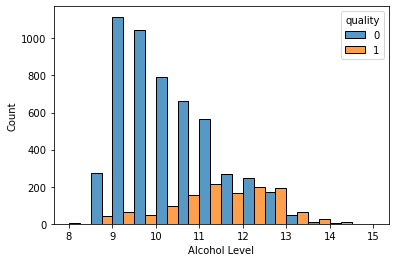

In [51]:
sns.histplot(data = dfwine, x = 'alcohol', hue='quality', multiple= 'dodge', binwidth=0.5)
plt.xlabel('Alcohol Level')
plt.ylabel('Count')

In [52]:
from sklearn.model_selection import cross_val_score
print('Logistic Regression Score: \n', (cross_val_score(make_pipeline(StandardScaler(),
      LogisticRegression()), dfwine.drop(['quality'], axis=1), dfwine.quality, cv=5)).mean().round(2))
print('Decision Tree Score: \n', (cross_val_score(tree.DecisionTreeClassifier(),
      dfwine.drop(['quality'], axis=1), dfwine.quality, cv=5)).mean().round(2))
print('Random Forest Score: \n', (cross_val_score(RandomForestClassifier(n_estimators=40),
                                                  dfwine.drop(['quality'], axis=1), dfwine.quality, cv=5)).mean().round(2))
print('SVC Score: \n', (cross_val_score(SVC(),
                                        dfwine.drop(['quality'], axis=1), dfwine.quality, cv=5)).mean().round(2))


Logistic Regression Score: 
 0.81
Decision Tree Score: 
 0.75
Random Forest Score: 
 0.81
SVC Score: 
 0.8


# K means

In [53]:
dfgt = pd.read_csv('gt_2015.csv')
dfgt.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


Text(0, 0.5, 'Carbon Monoxide')

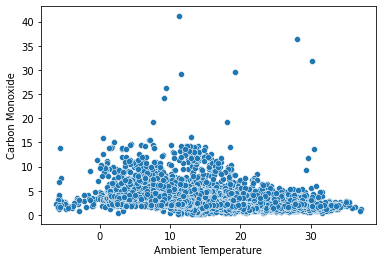

In [54]:
sns.scatterplot(data=dfgt, x = 'AT', y = 'CO')
plt.xlabel('Ambient Temperature')
plt.ylabel('Carbon Monoxide')

Text(0, 0.5, 'Sum of squared error')

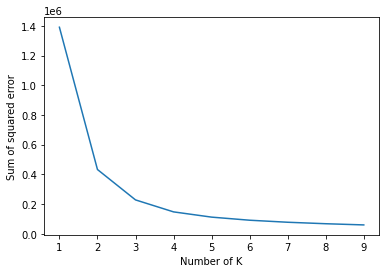

In [55]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
sse = []
k_rnd = range(1, 10)
for k in k_rnd:
    km = KMeans(n_clusters = k)
    km.fit(dfgt[['AH', 'CO']])
    sse.append(km.inertia_)

plt.plot(k_rnd, sse)
plt.xlabel('Number of K')
plt.ylabel('Sum of squared error')


Text(0, 0.5, 'Carbon Monoxide')

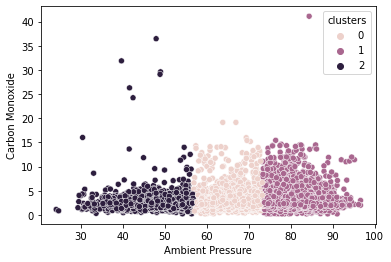

In [56]:
scaler = MinMaxScaler()
scaler.fit(dfgt)
k_means = KMeans(n_clusters=3)
y_predicted = (k_means.fit_predict(dfgt[['AH', 'CO']]))
dfgt['clusters'] = y_predicted
dfgt.head()
sns.scatterplot(data=dfgt, x = 'AH', y = 'CO', hue='clusters')
plt.xlabel('Ambient Pressure')
plt.ylabel('Carbon Monoxide')

Text(0, 0.5, 'Carbon Monoxide')

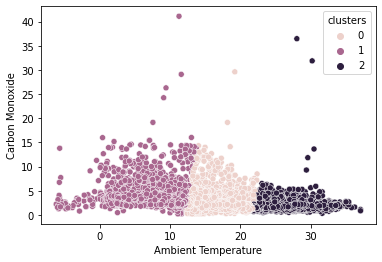

In [57]:
y_predicted = (k_means.fit_predict(dfgt[['AT', 'CO']]))
dfgt['clusters'] = y_predicted
dfgt.head()
sns.scatterplot(data=dfgt, x='AT', y='CO', hue='clusters')
plt.xlabel('Ambient Temperature')
plt.ylabel('Carbon Monoxide')


In [70]:
from sklearn.datasets import load_iris
df = load_iris()
df = pd.DataFrame(df.data, columns=df.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0.5, 0, 'K Means')

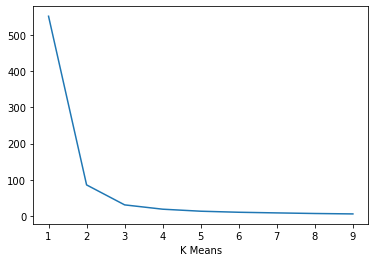

In [73]:
sse = []
k_rg = range(1, 10)
for k in k_rg:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)
plt.plot(k_rg, sse)
plt.xlabel('K Means')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


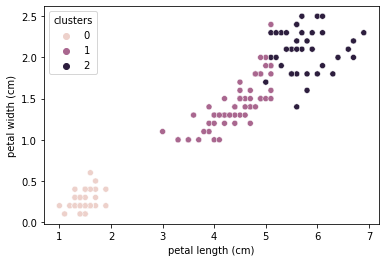

In [85]:
scaler = MinMaxScaler()
K_means = KMeans(n_clusters=3)
df['clusters'] = k_means.fit_predict(df)
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='clusters')
df.head()


# Naive Bayes classifier

In [121]:
dftitan = pd.read_csv('titanic.csv')
dftitan.isnull().sum()
dftitan['Age'] = dftitan['Age'].fillna(math.floor(dftitan['Age'].mean()))
dftitan['Fare'] = dftitan['Fare'].fillna(math.floor(dftitan['Fare'].mean()))
dftitan = dftitan[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
le_sx = LabelEncoder()
dftitan['Sex_number'] = le_sex.fit_transform(dftitan['Sex'])
dftitan.drop('Sex', axis=1, inplace=True)
dftitan.columns[dftitan.isna().any()]



Index([], dtype='object')